## Gradients

In [1]:
import torch

In [2]:
x = torch.tensor(2.0, requires_grad=True)

In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x +1
y

tensor(63., grad_fn=<AddBackward0>)

In [5]:
y.backward()

In [6]:
x.grad

tensor(93.)

In [7]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]], requires_grad=True)
x

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)

In [8]:
y = 3*x + 2
y

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)

In [9]:
z = 2*y**2
z

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)

In [10]:
out = z.mean()
out

tensor(140., grad_fn=<MeanBackward0>)

In [11]:
out.backward()

In [13]:
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

## Linear Regression

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [17]:
import torch.nn as nn

In [78]:
x = torch.linspace(1,50,50).reshape(-1,1)
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [79]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [80]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [81]:
y = 2*x + 1 + e
y.shape

torch.Size([50, 1])

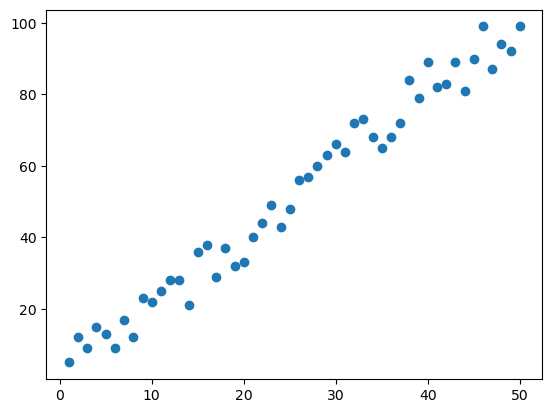

In [82]:
plt.scatter(x.numpy(), y.numpy())#.numpy method to convert from tensor to array
plt.show()

In [24]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [65]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [66]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [67]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [28]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [68]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [69]:
x1.shape

(50,)

In [70]:
w1 = 0.1059781
b1 = 0.9637961

y1 = w1*x1 + b1
y1

array([0.9637961 , 1.07193702, 1.18007794, 1.28821886, 1.39635977,
       1.50450069, 1.61264161, 1.72078253, 1.82892345, 1.93706437,
       2.04520528, 2.1533462 , 2.26148712, 2.36962804, 2.47776896,
       2.58590988, 2.69405079, 2.80219171, 2.91033263, 3.01847355,
       3.12661447, 3.23475539, 3.3428963 , 3.45103722, 3.55917814,
       3.66731906, 3.77545998, 3.8836009 , 3.99174181, 4.09988273,
       4.20802365, 4.31616457, 4.42430549, 4.53244641, 4.64058732,
       4.74872824, 4.85686916, 4.96501008, 5.073151  , 5.18129192,
       5.28943283, 5.39757375, 5.50571467, 5.61385559, 5.72199651,
       5.83013743, 5.93827834, 6.04641926, 6.15456018, 6.2627011 ])

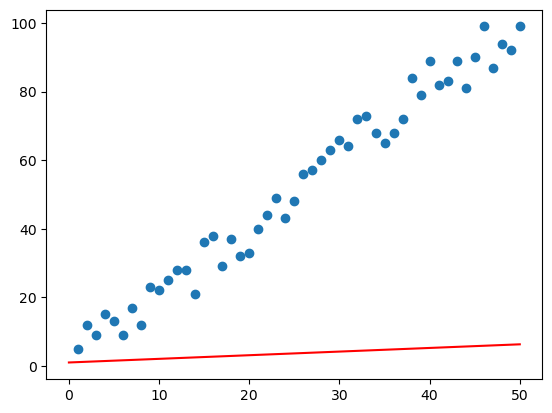

In [71]:
plt.plot(x1, y1, 'r')
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [72]:
criterion = nn.MSELoss()

In [73]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [74]:
epochs = 50
losses = []

for i in range(epochs):
    i +=1 
    #Predicting on forward pass
    y_pred = model.forward(x)
    #Calculate our loss (error)
    loss = criterion(y_pred, y)
    #Record that error
    losses.append(loss.item())
    print(f"epoch {i} loss:{loss.item()} weight:{model.linear.weight.item()} bias:{model.linear.bias.item()}")
    #Preventing compounding for gradients
    optimizer.zero_grad()
    #Backpropagate one step
    loss.backward()
    #Update parameters
    optimizer.step()

epoch 1 loss:3057.216796875 weight:0.10597813129425049 bias:0.9637961387634277
epoch 2 loss:1588.5311279296875 weight:3.334900379180908 bias:1.0604636669158936
epoch 3 loss:830.2999877929688 weight:1.0148327350616455 bias:0.9922628402709961
epoch 4 loss:438.8524169921875 weight:2.6817996501922607 bias:1.0425218343734741
epoch 5 loss:236.7615203857422 weight:1.4840211868286133 bias:1.0076650381088257
epoch 6 loss:132.4291229248047 weight:2.3446059226989746 bias:1.0339646339416504
epoch 7 loss:78.56572723388672 weight:1.7262253761291504 bias:1.0163217782974243
epoch 8 loss:50.75775909423828 weight:2.170504093170166 bias:1.0302516222000122
epoch 9 loss:36.4012336730957 weight:1.8512457609176636 bias:1.0214954614639282
epoch 10 loss:28.989229202270508 weight:2.0806007385253906 bias:1.029038906097412
epoch 11 loss:25.162382125854492 weight:1.9157683849334717 bias:1.0248701572418213
epoch 12 loss:23.186473846435547 weight:2.034165620803833 bias:1.0291162729263306
epoch 13 loss:22.16612625122

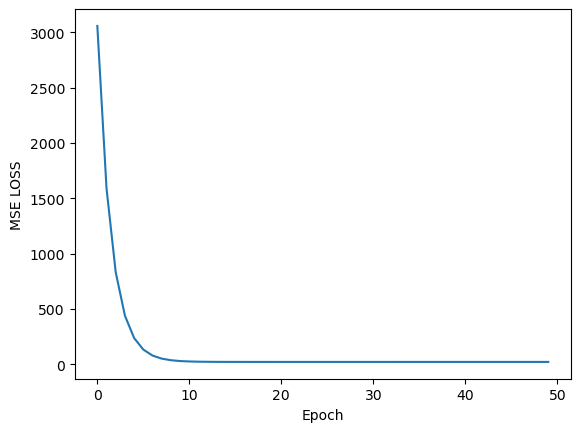

In [76]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')
plt.show()

In [84]:
x2 = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight * x2 + current_bias
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

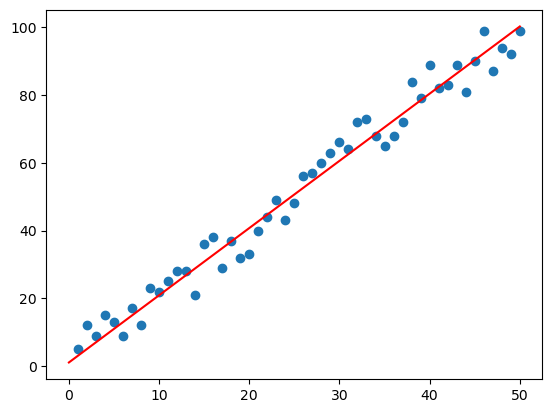

In [85]:
plt.plot(x2, predicted_y, 'r')
plt.scatter(x.numpy(), y.numpy())
plt.show()

## Datasets with pytorch

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
%matplotlib inline

In [29]:
df = pd.read_csv('iris.csv')

In [30]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
df.shape

(150, 5)

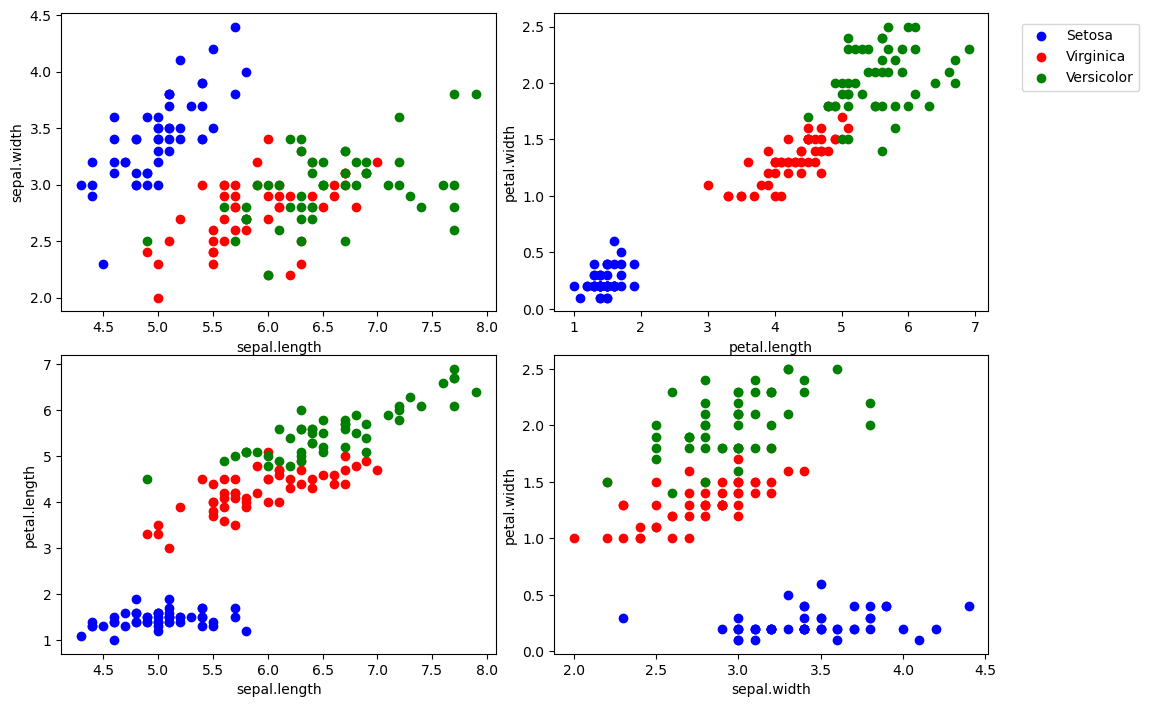

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Setosa','Virginica','Versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['variety']==df['variety'].value_counts().index[j]][x], 
                   df[df['variety']==df['variety'].value_counts().index[j]][y], 
                   color=colors[j])
        ax.set(xlabel=x, ylabel=y)
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['variety'])
df['variety'] = le.transform(df['variety'])

In [35]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
features = df.drop('variety', axis=1).values 
label = df['variety'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [39]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [41]:
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [42]:
y_test

tensor([[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [0],
        [2],
        [2],
        [2],
        [0],
        [2],
        [1],
        [2],
        [1],
        [2],
        [0],
        [1],
        [2],
        [0],
        [0],
        [2],
        [0],
        [2],
        [2],
        [1],
        [1],
        [2],
        [2]])

In [43]:
from torch.utils.data import TensorDataset, DataLoader

In [48]:
data = df.drop('variety',axis=1).values
labels = df['variety'].values

In [49]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))
type(iris)

torch.utils.data.dataset.TensorDataset

In [50]:
len(iris)

150

In [51]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [52]:
iris_loader = DataLoader(iris, batch_size=50, shuffle=True)

In [53]:
for i_batch, sample_batch in enumerate(iris_loader): #Batch number, [Tensor with features, Tensor with labels]
    print(i_batch, sample_batch)

0 [tensor([[6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [4.3000, 3.0000, 1.1000

## Basic Pytorch ANN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [62]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        #how many layers?
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        #Input layer(4 features) --> h1 (N)-- > h2(N) --> output(3 classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [63]:
class Model2(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.model2 = nn.Sequential(
                        nn.Linear(in_features, h1),
                        nn.ReLU(),
                        nn.Linear(h1, h2),
                        nn.ReLU(),
                        nn.Linear(h2,out_features)
        )
    
    def forward(self, x):
        return self.model2(x)
    

In [64]:
torch.manual_seed(32)
model = Model()
model2 = Model2()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [67]:
#Changing target class label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['variety'])
df['variety'] = le.transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
X = df.drop('variety', axis=1).values 
y = df['variety'].values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [71]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [72]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [74]:
criterion = nn.CrossEntropyLoss() #Muticlass classification problem
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

In [75]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [76]:
model2.parameters

<bound method Module.parameters of Model2(
  (model2): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=3, bias=True)
  )
)>

In [77]:
epochs = 100
losses = []

for i in range(epochs):
    i +=1
    #Forward and get a prediction
    y_pred = model.forward(X_train)
    #Calculate error/loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    if i%10==0:
        print(f"epoch {i} and loss is : {loss.item()}")
    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 10 and loss is : 0.9560549259185791
epoch 20 and loss is : 0.7922020554542542
epoch 30 and loss is : 0.6296348571777344
epoch 40 and loss is : 0.4166795611381531
epoch 50 and loss is : 0.2654173970222473
epoch 60 and loss is : 0.15697206556797028
epoch 70 and loss is : 0.10336200147867203
epoch 80 and loss is : 0.08226960152387619
epoch 90 and loss is : 0.07282204180955887
epoch 100 and loss is : 0.06745065003633499


In [78]:
epochs = 100
losses = []

for i in range(epochs):
    i +=1
    #Forward and get a prediction
    y_pred = model2.forward(X_train)
    #Calculate error/loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    if i%10==0:
        print(f"epoch {i} and loss is : {loss.item()}")
    #Backpropagation
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

epoch 10 and loss is : 0.9501538872718811
epoch 20 and loss is : 0.743666410446167
epoch 30 and loss is : 0.5123536586761475
epoch 40 and loss is : 0.3733404576778412
epoch 50 and loss is : 0.28685224056243896
epoch 60 and loss is : 0.20094864070415497
epoch 70 and loss is : 0.13471563160419464
epoch 80 and loss is : 0.0986008569598198
epoch 90 and loss is : 0.08073186874389648
epoch 100 and loss is : 0.0711493119597435


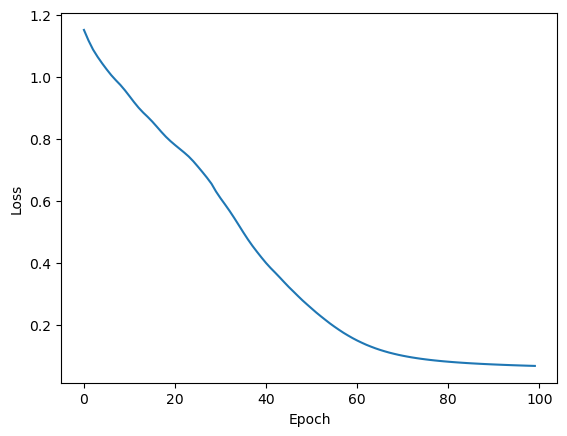

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [16]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [17]:
loss

tensor(0.0582)

In [21]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1}.) {str(y_val)} {y_test[i]}")
        if y_val.argmax().item() == y_test[i]:
            correct +=1
print(f"\nWe got {correct} correct !")

1.) tensor([-2.1234,  4.8067, -0.8803]) 1
2.) tensor([-1.7920,  5.3100, -1.5693]) 1
3.) tensor([  6.3723,   0.8741, -10.0971]) 0
4.) tensor([-3.9129,  4.5951,  1.1509]) 1
5.) tensor([-7.4882,  3.1953,  5.7839]) 2
6.) tensor([-10.5202,   1.6381,   9.6291]) 2
7.) tensor([  6.3364,   1.0237, -10.1951]) 0
8.) tensor([  7.0690,   0.7370, -10.9620]) 0
9.) tensor([-7.2218,  3.3422,  5.3528]) 2
10.) tensor([-9.4170,  2.5675,  8.1028]) 2
11.) tensor([-9.9029,  2.3388,  8.7142]) 2
12.) tensor([ 6.2942,  0.6938, -9.8046]) 0
13.) tensor([-9.3335,  2.1817,  8.1917]) 2
14.) tensor([-3.7832,  4.5046,  1.0603]) 1
15.) tensor([-7.8793,  3.0060,  6.2225]) 2
16.) tensor([-1.8810,  5.1571, -1.3572]) 1
17.) tensor([-5.7107,  3.5003,  3.6612]) 2
18.) tensor([  7.2014,   0.7687, -11.1842]) 0
19.) tensor([-3.2961,  4.7939,  0.3307]) 1
20.) tensor([-7.7822,  3.7560,  5.7040]) 2
21.) tensor([  6.6703,   0.8191, -10.4707]) 0
22.) tensor([  7.4580,   0.9259, -11.7103]) 0
23.) tensor([-9.7801,  2.1658,  8.6656]) 2

In [22]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [23]:
new_model = Model()#Assume you still have the original class
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [24]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
torch.save(model, 'my_iris_model.pt') #Entire model with own class

In [25]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

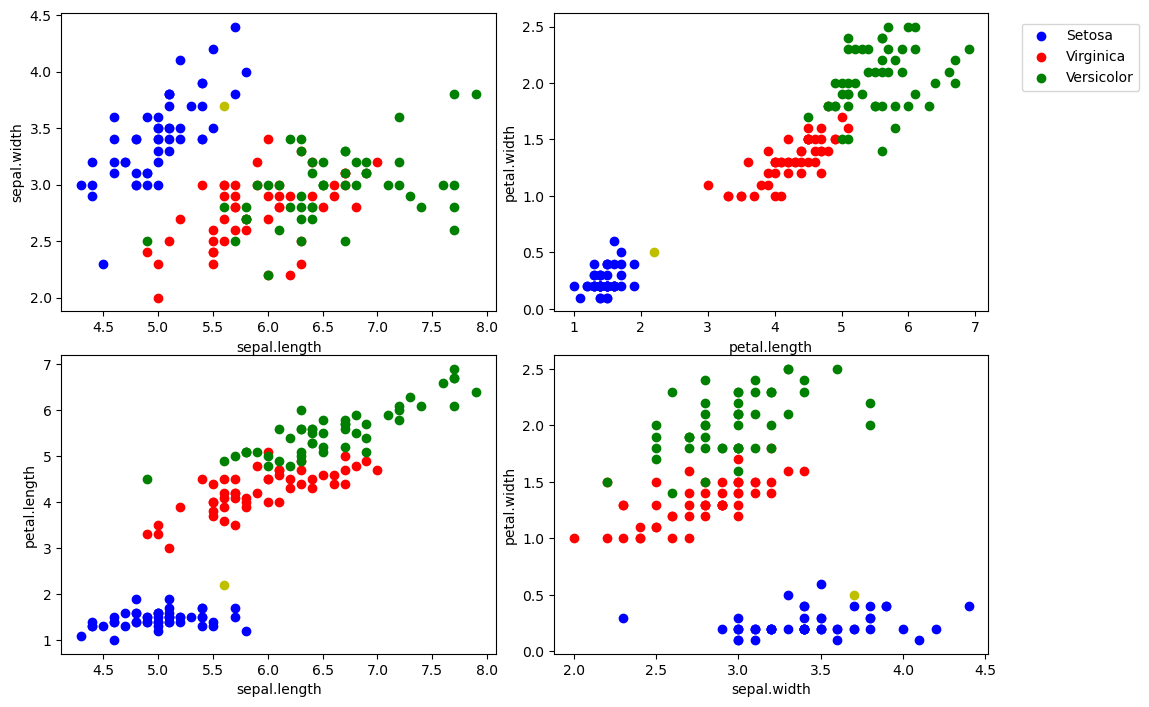

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Setosa','Virginica','Versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['variety']==df['variety'].value_counts().index[j]][x], 
                   df[df['variety']==df['variety'].value_counts().index[j]][y], 
                   color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    #Assing mystery plot
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y')
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()

In [28]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9874,   1.5769, -10.0753])
tensor(0)


## Full ANN Regression

In [42]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df = pd.read_csv('NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [70]:
df.shape

(120000, 8)

In [71]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [72]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculate the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371 #Average radius of Earth in kilometers
    
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2] - df[lat1])
    delta_lambda = np.radians(df[long2] - df[long1])
    
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) #in kilometers
    return d

In [73]:
df['distance_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [74]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   distance_km        120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [76]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   distance_km        120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [77]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [78]:
df['pickup_datetime'][0]

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [79]:
my_time = df['pickup_datetime'][0]
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [80]:
my_time.hour

8

In [81]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4) #Because difference between UTC and EST 

In [82]:
df['Hour'] = df['EDTdate'].dt.hour

In [83]:
df['AMorPM'] = np.where(df['Hour']>12, 'pm', 'am')

In [84]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")#Getting weekday

In [103]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','distance_km']

In [86]:
y_col = ['fare_amount']

In [87]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
EDTdate              datetime64[ns, UTC]
Hour                               int32
AMorPM                            object
Weekday                           object
dtype: object

In [88]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [89]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [90]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [91]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [92]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [93]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [94]:
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    0
Length: 120000, dtype: int8

In [95]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [96]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [97]:
df['Weekday'].cat.codes.values #numpy arrays

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [98]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [99]:
cats = np.stack([hr, ampm, wkdy], axis=1) #Stack them as columns

In [100]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  0,  2]], dtype=int8)

In [ ]:
#cats = np.stack([df[col].cat.codes.values for col in cat_cols], axis=1)

In [101]:
cats = torch.tensor(cats, dtype=torch.int64)

In [104]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [105]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [106]:
conts = torch.tensor(conts, dtype=torch.float)

In [107]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [111]:
y = torch.tensor(df[y_col].values, dtype=torch.float)

In [112]:
cats.shape

torch.Size([120000, 3])

In [113]:
conts.shape

torch.Size([120000, 6])

In [114]:
y.shape

torch.Size([120000, 1])

In [115]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
cat_szs

[24, 2, 7]

In [116]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [117]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [118]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [119]:
#Forward method
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [120]:
embeddingz

[tensor([[-0.7447,  0.2670, -0.0285, -2.2079, -1.0934, -0.5164, -2.1527,  0.4424,
           1.7633,  0.2638, -0.3449, -1.2991],
         [-2.6169, -0.0062,  0.5966, -0.0679,  0.5953,  0.2693, -0.9314,  0.6125,
           0.9720, -0.8856,  0.1782,  0.0460],
         [ 0.8122, -1.1812, -0.9458,  1.5843, -1.1678, -1.1169,  0.3450,  0.0155,
           0.6638,  0.5718,  0.0034, -0.0181],
         [-0.1915, -2.0699, -1.5566, -0.9438,  0.5087,  0.6881, -0.1271, -1.2427,
          -1.0252,  1.3716,  1.3680, -0.9446]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.4533],
         [0.4533],
         [0.4533],
         [0.4078]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3996, -1.1936, -1.9816, -0.1600],
         [-0.1782, -0.3077, -0.2026, -1.4887],
         [-0.1782, -0.3077, -0.2026, -1.4887],
         [ 0.0967, -0.2465,  0.7779, -0.8365]], grad_fn=<EmbeddingBackward0>)]

In [121]:
z = torch.cat(embeddingz, 1)#Concatenate previous embeddings for each observation
z

tensor([[-0.7447,  0.2670, -0.0285, -2.2079, -1.0934, -0.5164, -2.1527,  0.4424,
          1.7633,  0.2638, -0.3449, -1.2991,  0.4533, -0.3996, -1.1936, -1.9816,
         -0.1600],
        [-2.6169, -0.0062,  0.5966, -0.0679,  0.5953,  0.2693, -0.9314,  0.6125,
          0.9720, -0.8856,  0.1782,  0.0460,  0.4533, -0.1782, -0.3077, -0.2026,
         -1.4887],
        [ 0.8122, -1.1812, -0.9458,  1.5843, -1.1678, -1.1169,  0.3450,  0.0155,
          0.6638,  0.5718,  0.0034, -0.0181,  0.4533, -0.1782, -0.3077, -0.2026,
         -1.4887],
        [-0.1915, -2.0699, -1.5566, -0.9438,  0.5087,  0.6881, -0.1271, -1.2427,
         -1.0252,  1.3716,  1.3680, -0.9446,  0.4078,  0.0967, -0.2465,  0.7779,
         -0.8365]], grad_fn=<CatBackward0>)

In [122]:
selfembdrop = nn.Dropout(0.4)

In [123]:
z = selfembdrop(z)
z

tensor([[-1.2411,  0.0000, -0.0475, -3.6799, -1.8223, -0.0000, -3.5878,  0.7373,
          0.0000,  0.0000, -0.5748, -2.1652,  0.7555, -0.0000, -1.9894, -0.0000,
         -0.0000],
        [-4.3615, -0.0103,  0.9943, -0.1132,  0.9922,  0.4488, -0.0000,  0.0000,
          0.0000, -1.4760,  0.0000,  0.0767,  0.0000, -0.0000, -0.5128, -0.0000,
         -0.0000],
        [ 1.3537, -1.9687, -1.5763,  2.6405, -0.0000, -1.8615,  0.0000,  0.0258,
          0.0000,  0.9530,  0.0000, -0.0301,  0.0000, -0.2969, -0.0000, -0.3377,
         -2.4812],
        [-0.3192, -3.4499, -2.5943, -0.0000,  0.0000,  1.1468, -0.2119, -2.0711,
         -1.7087,  2.2860,  0.0000, -1.5744,  0.0000,  0.1611, -0.4109,  1.2964,
         -0.0000]], grad_fn=<MulBackward0>)

In [129]:
class TabularModel(nn.Module):
    
    def __init__(self, emb_szs, n_cont, out_sz,layers, p=0.5):
        
        #layers : [200,10,5]
        
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_embs = sum([nf for ni,nf in emb_szs])
        n_in = n_embs + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))#to be revisited
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
            
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x
        

In [130]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [131]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [132]:
criterion = nn.MSELoss() #np.sqrt(mse) -> rmse
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [133]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [134]:
#Data shuffled already
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
cont_train = conts[:batch_size-test_size]
cont_test = conts[batch_size-test_size:batch_size]

In [135]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [136]:
len(cat_train)

48000

In [137]:
len(cont_train)

48000

In [139]:
len(cat_test)

12000

In [140]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, cont_train)
    loss = torch.sqrt(criterion(y_pred, y_train))#rmse
    losses.append(loss.item())
    if i%20==1:
        print(f"epoch {i} loss is {loss.item()}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time()-start_time
print(f"Training took {duration/60} minutes")

epoch 1 loss is 12.586905479431152
epoch 21 loss is 11.121370315551758
epoch 41 loss is 10.46048641204834
epoch 61 loss is 10.027897834777832
epoch 81 loss is 9.634709358215332
epoch 101 loss is 9.172706604003906
epoch 121 loss is 8.578141212463379
epoch 141 loss is 7.807574272155762
epoch 161 loss is 6.917910099029541
epoch 181 loss is 5.967058181762695
epoch 201 loss is 5.016525745391846
epoch 221 loss is 4.339516639709473
epoch 241 loss is 3.9065146446228027
epoch 261 loss is 3.798497200012207
epoch 281 loss is 3.722611904144287
Training took 1.1924061059951783 minutes


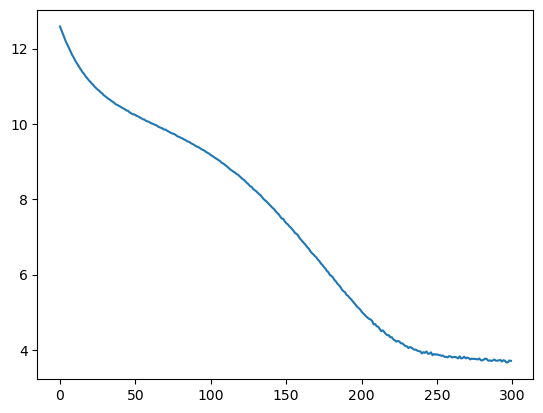

In [141]:
plt.plot(range(epochs), losses)
plt.show()

In [142]:
with torch.no_grad():
    y_val = model(cat_test, cont_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [143]:
loss

tensor(3.6349)

In [146]:
for i in range(10):
    print(f"Predicted: {y_val[i].item():8.4f} True: {y_test[i].item():8.2f}")

Predicted:   5.2900 True:     2.90
Predicted:  13.0812 True:     5.70
Predicted:   7.8273 True:     7.70
Predicted:  14.6951 True:    12.50
Predicted:   6.9042 True:     4.10
Predicted:   6.0040 True:     5.30
Predicted:   2.1044 True:     3.70
Predicted:  18.6150 True:    14.50
Predicted:   4.9192 True:     5.70
Predicted:  13.8352 True:    10.10


In [147]:
torch.save(model.state_dict(),'TaxiModel.pt')

## Full ANN Classification